In [43]:
## all imports - some duplicates, some not needed. Will clean up 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from matplotlib import pyplot



In [44]:
#read in file
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [45]:
#show dataframe info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [46]:
#find null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [47]:
#replace nulls with mean
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(), inplace=True)

In [48]:
#verify all nulls are gone
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [49]:
#more info on df
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [50]:
#correlation matrix
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [51]:
# verify number of genders in dataframe
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [52]:
#take out the one 'other' gender. If there had been more representation 
#in that category we could keep but since it is only one it is going.  

delete_row = df[df["gender"]=='Other'].index
df = df.drop(delete_row)
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [53]:
#drop the id
df = df.drop('id', axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [54]:
#label encode binary options
le = LabelEncoder()

df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['gender'] = le.fit_transform(df['gender'])


In [55]:
# one hot encode the non binary options
df_ohencoded = pd.get_dummies(df)
pd.set_option('display.max_columns', None)
df_ohencoded

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.893237,0,0,0,1,0,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.600000,0,0,0,1,0,0,0,1,0,0


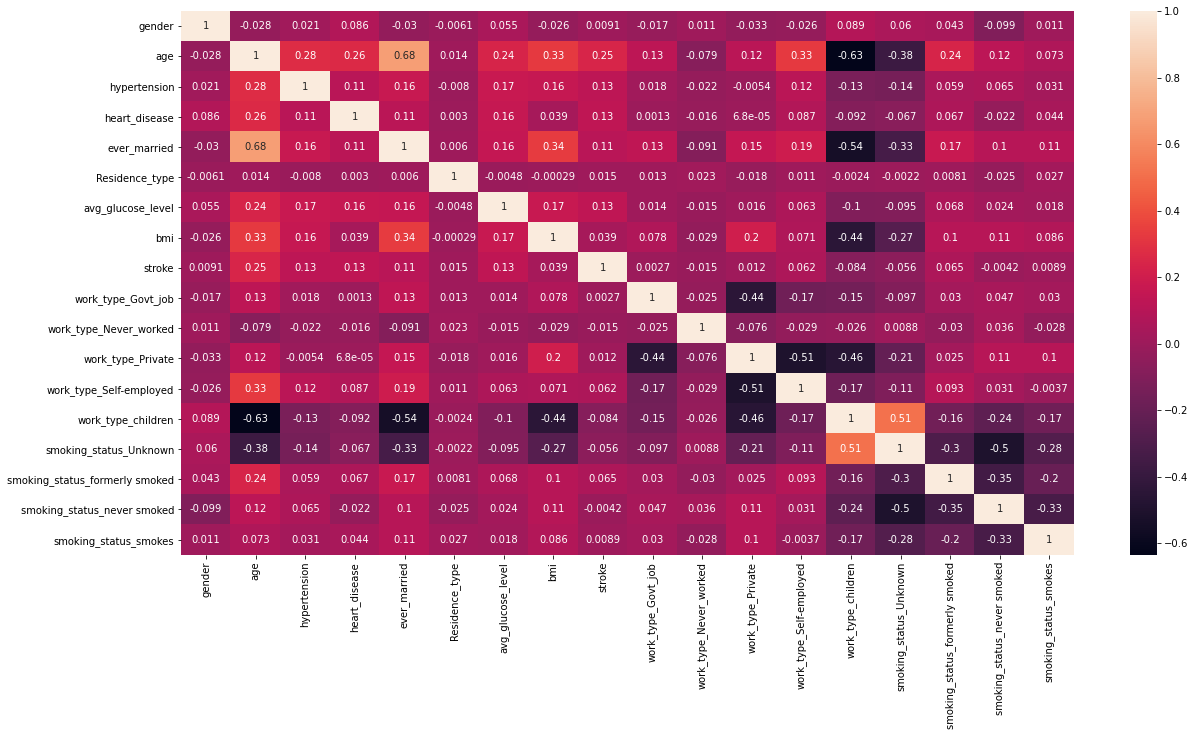

In [56]:
#heatmap
plt.figure(figsize = (20,10))
sns.heatmap(df_ohencoded.corr(), annot=True)
plt.show()

In [57]:
#separate the data to X and y
X = df_ohencoded.drop('stroke', axis=1)
y = df_ohencoded['stroke']
# SMOTEless train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 27, stratify = y)
# standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
#xtrain and y train with smote
sm = SMOTE(random_state=27)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)



In [58]:

def evaluate(X_train,y_train,X_test,y_test, smote):
    """Function that loops through several models and produces various scores"""
    models= [['Logistic Regression ',LogisticRegression(random_state = 50, max_iter = 10000)],
            ['KNearest Neighbor ',KNeighborsClassifier(n_neighbors = 285)],
            ['Decision Tree Classifier ',DecisionTreeClassifier(random_state =27, max_depth =2, min_samples_split =3)],
            ['Ada Boost ',AdaBoostClassifier(random_state = 27, n_estimators = 137)],
            ['SVM ',SVC(random_state = 27, kernel = 'linear')]]

    for name,model in models:

        model = model
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        roc = roc_auc_score(y_test, y_pred) 
        precision = precision_score(y_test, y_pred) 
        recall = recall_score(y_test, y_pred) 
        f1 = f1_score(y_test, y_pred) 
        cm_model = confusion_matrix(y_test, y_pred)
        
        if smote == 1:
            print ("Smote Version")

        print(name)
        print('CM Model: ')
        print(cm_model)
        print('Test Accuracy: ',accuracy_score(y_test,model.predict(X_test)))
        print('Training Accuracy: ',accuracy_score(y_train,model.predict(X_train)))
        print('ROC AUC Score: ', roc)
        print('Precision: ', precision)
        print('Recall: ', recall)
        print('f1: ', f1)

        print('-------------------------------------------------')
        
    
        


In [59]:
# Scores without using SMOTE
evaluate(X_train,y_train,X_test,y_test, 0)


C:\Users\weird\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression 
CM Model: 
[[1458    0]
 [  75    0]]
Test Accuracy:  0.9510763209393346
Training Accuracy:  0.9513422818791947
ROC AUC Score:  0.5
Precision:  0.0
Recall:  0.0
f1:  0.0
-------------------------------------------------


C:\Users\weird\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNearest Neighbor 
CM Model: 
[[1458    0]
 [  75    0]]
Test Accuracy:  0.9510763209393346
Training Accuracy:  0.9513422818791947
ROC AUC Score:  0.5
Precision:  0.0
Recall:  0.0
f1:  0.0
-------------------------------------------------
Decision Tree Classifier 
CM Model: 
[[1458    0]
 [  75    0]]
Test Accuracy:  0.9510763209393346
Training Accuracy:  0.9513422818791947
ROC AUC Score:  0.5
Precision:  0.0
Recall:  0.0
f1:  0.0
-------------------------------------------------


C:\Users\weird\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ada Boost 
CM Model: 
[[1458    0]
 [  74    1]]
Test Accuracy:  0.9517286366601435
Training Accuracy:  0.9532997762863534
ROC AUC Score:  0.5066666666666667
Precision:  1.0
Recall:  0.013333333333333334
f1:  0.02631578947368421
-------------------------------------------------
SVM 
CM Model: 
[[1458    0]
 [  75    0]]
Test Accuracy:  0.9510763209393346
Training Accuracy:  0.9513422818791947
ROC AUC Score:  0.5
Precision:  0.0
Recall:  0.0
f1:  0.0
-------------------------------------------------


C:\Users\weird\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
# Scores using SMOTE
evaluate(X_train_smote,y_train_smote,X_test,y_test, 1)


Smote Version
Logistic Regression 
CM Model: 
[[1084  374]
 [  17   58]]
Test Accuracy:  0.7449445531637312
Training Accuracy:  0.7833627278071722
ROC AUC Score:  0.75840877914952
Precision:  0.13425925925925927
Recall:  0.7733333333333333
f1:  0.2287968441814596
-------------------------------------------------
Smote Version
KNearest Neighbor 
CM Model: 
[[894 564]
 [  9  66]]
Test Accuracy:  0.6262230919765166
Training Accuracy:  0.7361845972957084
ROC AUC Score:  0.7465843621399177
Precision:  0.10476190476190476
Recall:  0.88
f1:  0.1872340425531915
-------------------------------------------------
Smote Version
Decision Tree Classifier 
CM Model: 
[[812 646]
 [  5  70]]
Test Accuracy:  0.5753424657534246
Training Accuracy:  0.7748383303938859
ROC AUC Score:  0.7451303155006859
Precision:  0.09776536312849161
Recall:  0.9333333333333333
f1:  0.17699115044247787
-------------------------------------------------
Smote Version
Ada Boost 
CM Model: 
[[493 965]
 [  3  72]]
Test Accuracy

In [61]:
#option 1 - the parameters together

def evaluate_2( n_splits, n_repeats, n_jobs):
    models= [['AdaBoost ',AdaBoostClassifier()],
            ['DecisionTree ',DecisionTreeClassifier()]]


    for name,model in models:
        resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
        pipeline=Pipeline(steps=[('r', resample), ('m', model)])
        cv=RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
        scoring=['accuracy','precision_macro','recall_macro']
        scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=n_jobs)
        print(name)
        print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
        print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
        print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

        print('----------------------------------------')
        
    
        


In [62]:
evaluate_2(10, 3, -1)

AdaBoost 
Mean Accuracy: 0.8370
Mean Precision: 0.5613
Mean Recall: 0.6793
----------------------------------------
DecisionTree 
Mean Accuracy: 0.8536
Mean Precision: 0.5504
Mean Recall: 0.6246
----------------------------------------


In [63]:
#option 2, run the adaboost and decisiontree with kfold individually to adjust the parameters. It is set up with default ones. 
def evaluate_3(model, n_splits = 10, n_repeats = 3, n_jobs = -1):
    resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
    pipeline=Pipeline(steps=[('r', resample), ('m', model)])
    cv=RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    scoring=['accuracy','precision_macro','recall_macro']
    scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=n_jobs)

    print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
    print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
    print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

In [64]:
model=AdaBoostClassifier(random_state =27)
evaluate_3(model)

Mean Accuracy: 0.8379
Mean Precision: 0.5629
Mean Recall: 0.6837


In [65]:
model_2 = DecisionTreeClassifier()
evaluate_3(model)

Mean Accuracy: 0.8364
Mean Precision: 0.5640
Mean Recall: 0.6894


In [86]:
# finding the right number of neighbors
def optimize(upper):
    k = 0
    n = 0 
    for number in range(1, upper):
        knn = KNeighborsClassifier(n_neighbors = number)
        knn.fit(X_train_smote, y_train_smote)
        y_pred = knn.predict(X_test)       
        b = recall_score(y_test, y_pred)
        if b>k:
            n=number
            k=b

    print('The recall score is ' + str(k))
    print('The optimal n_neighbor number is ' + str(n))

optimize(300)
    

The recall score is 0.88
The optimal n_neighbor number is 285


In [66]:
def optimizeAda(upper):
    k = 0
    n = 0 
    for number in range(1, upper):
        abc = AdaBoostClassifier(n_estimators = number)
        abc.fit(X_train_smote, y_train_smote)
        y_pred = abc.predict(X_test)       
        b = recall_score(y_test, y_pred)
        if b>k:
            n=number
            k=b
    print('The recall score is ' + str(k))
    print('The optimal n_estimators number is ' + str(n))

optimizeAda(300)
    

The recall score is 0.96
The optimal n_estimators number is 137


In [94]:
# finding the best learning rate. Looks like the optimal one is the default. 

def optimizeAdaLR():
    k = 0
    n = [.00001, .0001, .001, .01, .1, 1, 1.1, 1.2, 1.3, 1.4 , 1.5, 1,6, 1.7, 1.8, 1.9, 2.0] 
    for number in n:
        abc = AdaBoostClassifier(n_estimators = 137, learning_rate = number)
        abc.fit(X_train_smote, y_train_smote)
        y_pred = abc.predict(X_test)       
        b = recall_score(y_test, y_pred)
        if b>k:
            n=number
            k=b
    
        
    print('The recall score is ' + str(k))
    print('The optimal learning rate is ' + str(n))

    
    
    
optimizeAdaLR()

The recall score is 0.96
The optimal learning rate is 1


In [165]:
# Fine tuning DecisionTreeClassifier - didn't keep every iteration 
dtc = DecisionTreeClassifier(random_state = 27, max_depth = 2, min_samples_leaf = 5)
dtc.fit(X_train_smote, y_train_smote)
y_pred = dtc.predict(X_test)  
c = accuracy_score(y_test,dtc.predict(X_test))
b = recall_score(y_test, y_pred)

print('The recall score is ' + str(b))
print("accuracy = " + str(c))
    
    
    


The recall score is 0.9333333333333333
accuracy = 0.5753424657534246


In [181]:
#fine tuning SVC - didn't keep every iteration
k = 0
n = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'] 

sv = SVC(random_state = 27, kernel = 'linear')
sv.fit(X_train_smote, y_train_smote)
y_pred = sv.predict(X_test)     
c = accuracy_score(y_test,sv.predict(X_test))

b = recall_score(y_test, y_pred)

print('The recall score is ' + str(b))
print("accuracy = " + str(c))
    
    
    


The recall score is 0.8133333333333334
accuracy = 0.7247227658186562


In [42]:
def optimizeC(upper):
    k = 0
    n = 0 
    for number in range(1, upper):
        sv = SVC(random_state = 27, kernel = 'linear', C= number)
        sv.fit(X_train_smote, y_train_smote)
        y_pred = sv.predict(X_test)       
        b = recall_score(y_test, y_pred)
        if b>k:
            n=number
            k=b
    
        
    print('The recall score is ' + str(k))
    print('The optimal C is ' + str(n))

    
    
    
optimizeC(20)
    

The recall score is 0.8133333333333334
The optimal C is 1
